In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style

In [94]:
with open('../Lab1/Data/titanic.csv') as f:
    df = pd.read_csv(f, dtype = {'age': np.float64, 'sibsp': np.int64, 'patch': np.int64})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [96]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [97]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1,keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

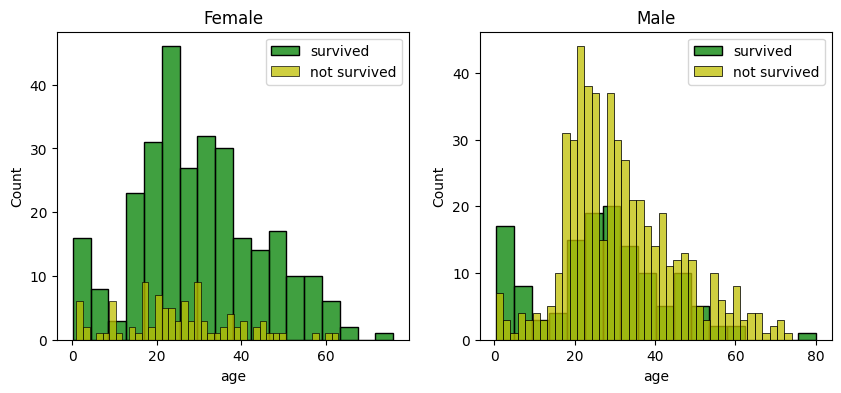

In [98]:
survived = 'survived'
not_survived = 'not survived'
fig, axes =plt.subplots(nrows = 1, ncols = 2, figsize =(10,4))
women = df[df['sex'] == 'female']
men = df[df['sex'] == 'male']
ax = sns.histplot(women[women['survived'] == 1].age.dropna(), bins = 18, label = survived, ax =  axes[0], kde = False, color = 'g')
ax = sns.histplot(women[women['survived'] == 0].age.dropna(), bins = 40, label = not_survived, ax =  axes[0], kde = False, color = 'y')
ax.legend()
ax.set_title("Female")
ax = sns.histplot(men[men['survived'] == 1].age.dropna(), bins = 18, label = survived, ax =  axes[1], kde = False, color = 'g')
ax = sns.histplot(men[men['survived'] == 0].age.dropna(), bins = 40, label = not_survived, ax =  axes[1], kde = False, color = 'y')
ax.legend()
_ = ax.set_title("Male")

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

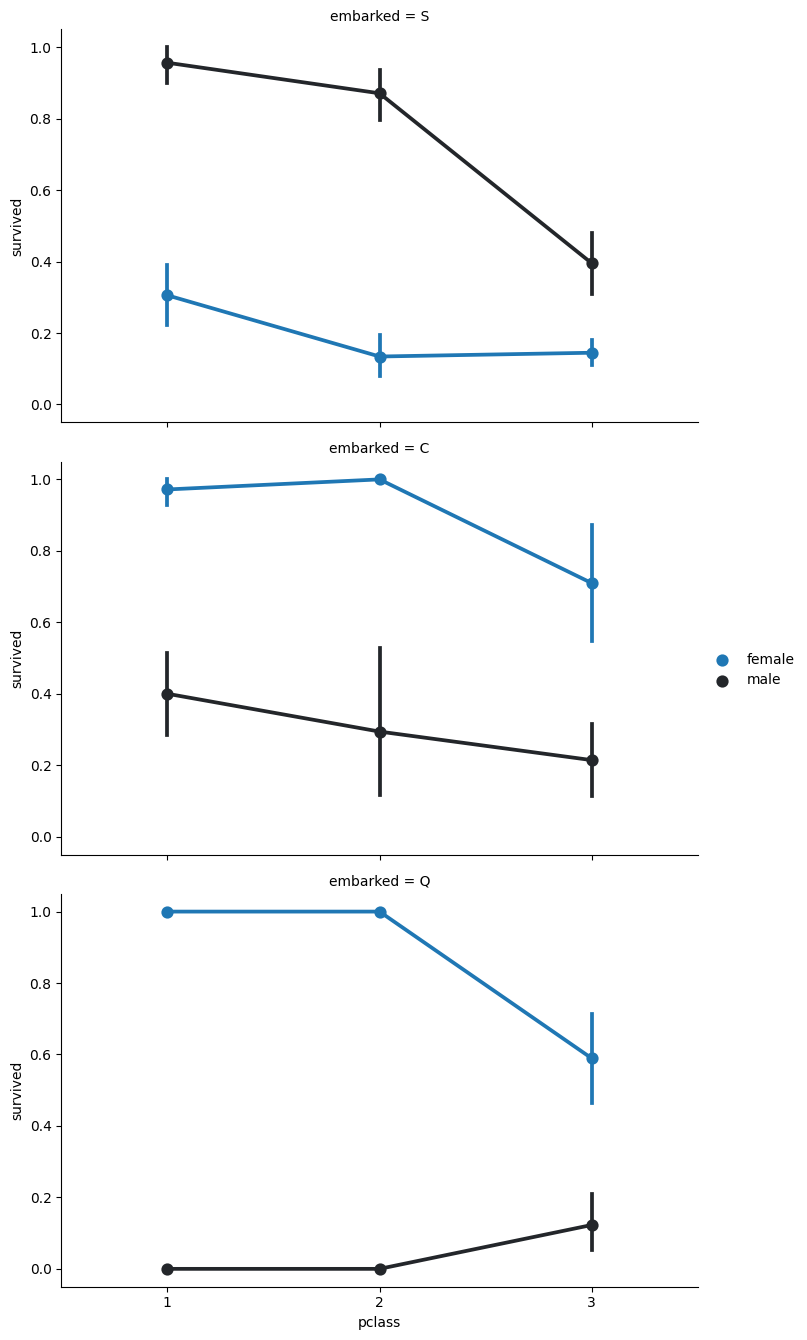

In [99]:
FaceGrid = sns.FacetGrid(df, row = 'embarked', height=4.5, aspect = 1.6)
FaceGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette = None, order = None, hue_order = None)
FaceGrid.add_legend()

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pclass', ylabel='survived'>

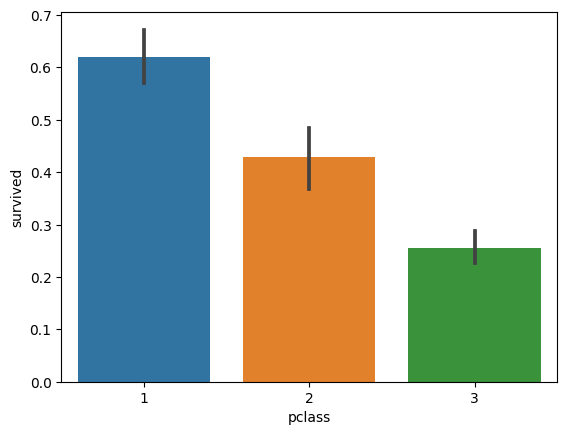

In [100]:
sns.barplot(x ='pclass', y ='survived', data = df)

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


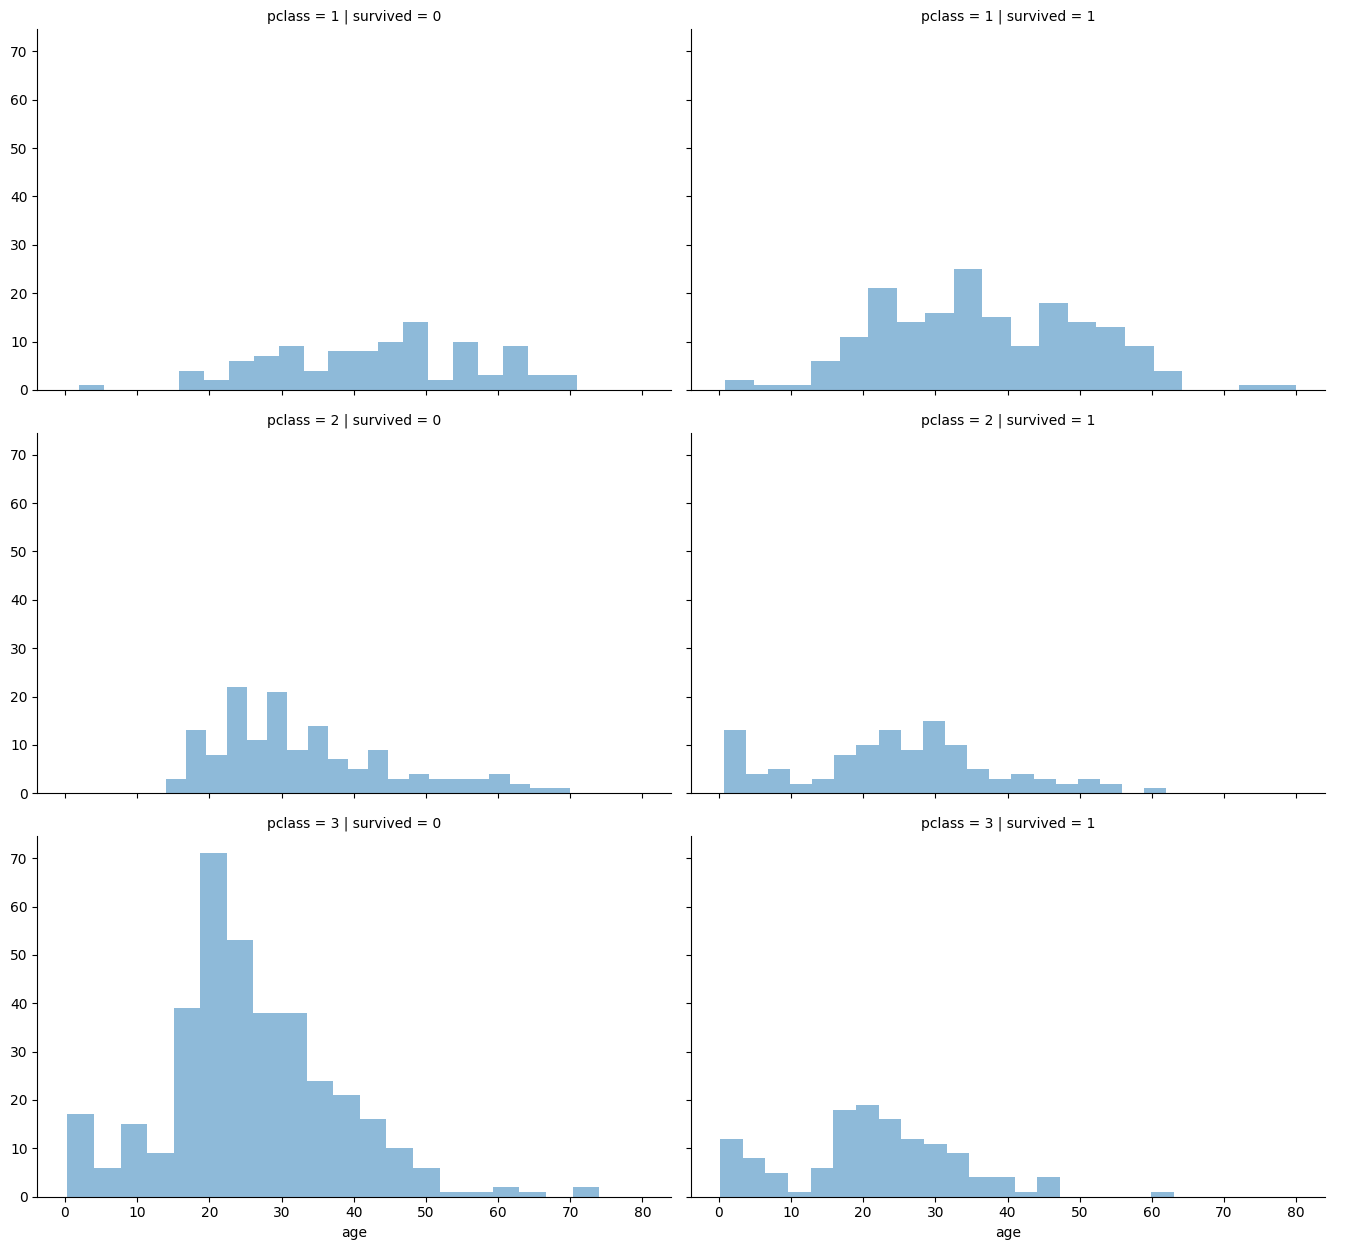

In [101]:
grid = sns.FacetGrid(df, col = 'survived', row = 'pclass', height=4.2, aspect = 1.6)
grid.map(plt.hist, 'age', alpha = .5, bins = 20)
grid.add_legend()

In [102]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

not_alone
1    790
0    519
Name: count, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

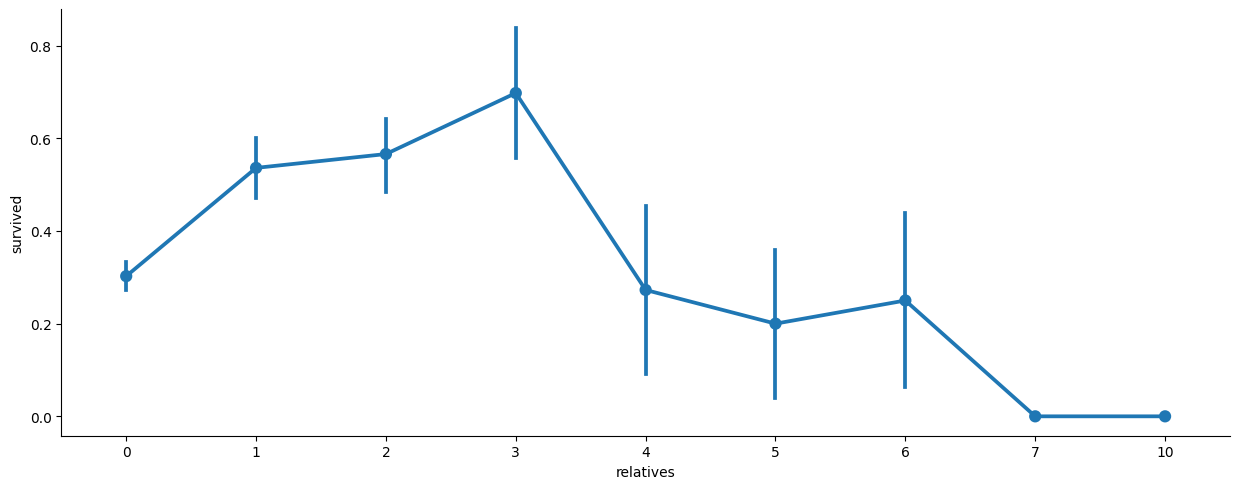

In [103]:
axes = sns.catplot(x = 'relatives',y = 'survived', data = df, aspect = 2.5, kind = 'point')

In [104]:
import re
deck =  {"A": 1, "B": 2, "C": 3, "D": 4,"E": 5, "F": 6, "G": 7, "U": 8}
for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
df = df.drop(['cabin'], axis = 1)

In [105]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [106]:
df = df.drop(['ticket'], axis = 1)
df = df.drop(['boat'], axis = 1)
df = df.drop(['body'], axis = 1)
df = df.drop(['home.dest'], axis = 1)

In [107]:
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
dataset["age"].isnull().sum()

0

In [108]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [109]:
common_value = 'S'
for dataset in [df]:
    df['embarked'] = df['embarked'].fillna(common_value)

In [111]:
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,S,0,1,2
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,151.5500,S,3,0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,151.5500,S,3,0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.5500,S,3,0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.5500,S,3,0,3
5,1,1,"Anderson, Mr. Harry",male,48,0,0,26.5500,S,0,1,5
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,77.9583,S,1,0,4
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,0.0000,S,0,1,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,51.4792,S,2,0,3
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,49.5042,C,0,1,8
